# Vocabulary

In [1]:
import numpy as np, pandas as pd, sklearn, matplotlib.pyplot as plt, seaborn as sns
import re
import math
import statistics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

#label_dict = {1.0:'A', 1.5: 'B', 2: 'C', 2.5: 'D', 3: 'E', 3.5: 'F', 4: 'G', 4.5: 'H', 5: 'I'}

In [2]:
dataset = pd.read_csv('data/train.csv')
english_vocab_frequency =  pd.read_csv('vocabulary_data/unigram_freq.csv')

In [3]:
dataset.head(2)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


In [5]:
dataset.full_text[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [6]:
import time
start_time = time.time()

dataset = pd.read_csv('data/train.csv')
english_vocab_frequency =  pd.read_csv('vocabulary_data/unigram_freq.csv')
english_vocab_frequency_dict =  dict(zip(english_vocab_frequency['word'], english_vocab_frequency['count']))
#print(len(english_vocab_frequency_dict))
oov_list = []
total_unique_words = []
#sentence_number = 0

print(dataset['full_text'][0])

def clean_dataset(dataset_row):
    #dataset_row["full_text"] = dataset_row["full_text"].lower()
    dataset_row["full_text"] = dataset_row["full_text"].lower()
    dataset_row["full_text"] = re.sub('[\t\n\r]', ' ', dataset_row["full_text"]) #Removing \n, \t, \r from from full_test
    dataset_row["full_text"] = re.sub('[^0-9a-z]', ' ', dataset_row["full_text"]) #Replace all symbols except a-z and 0-9 with spaces
    dataset_row["full_text"] = re.sub('\s{2,}', ' ', dataset_row["full_text"]) #Replacing two or more spaces with single space
    dataset_row['full_text'] = dataset_row["full_text"].strip() #Removing start or end of line spaces from full_test
    return dataset_row['full_text']

def avg_unique_words(dataset_row):
    dict_ = {}
    words = dataset_row['full_text'].split()
    for word in words:
        dict_[word] = 1
        
    return len(dict_)/len(words)

def word_freq_score(dataset_row, english_vocab_frequency_dict):
    global oov_list
    global total_unique_words
    freq_score = 0
    #print(dataset_row)
    words = dataset_row['full_text'].split()
    global sentence_number
    
#     if(sentence_number%50 == 0):
#         print("sentencer_number is ", sentence_number)
#     sentence_number+=1
    for word in words:
#         print(word)
        if word in english_vocab_frequency_dict:
            #print(english_vocab_frequency[english_vocab_frequency['word'] == word])
            total_unique_words.append(word)
            freq_score += math.exp(1/english_vocab_frequency_dict[word])
        else:
            #print(word)
            oov_list.append(word)
            #freq_score += 1/math.log(english_vocab_frequency_dict['the'])
            #freq_score += math.log(1/english_vocab_frequency_dict[word])
            #print(word)
            
    return math.log(freq_score)

def vocab_label(dataset_row):
    return label_dict[dataset_row['vocabulary']]
            
dataset['full_text'] = dataset.apply(clean_dataset, axis = 1)
dataset['text_length'] = dataset.apply(lambda x: len(x['full_text'].split()), axis = 1)
dataset['avg_word_length'] = dataset.apply(lambda x: statistics.mean([len(i) for i in x['full_text'].split()]), axis = 1)
dataset['avg_unique_words_per_total_words'] = dataset.apply(avg_unique_words, axis = 1)
dataset['word_frequency_score'] = dataset.apply(lambda x: word_freq_score(dataset_row = x, english_vocab_frequency_dict = english_vocab_frequency_dict), axis = 1)
#dataset['vocab_label'] = dataset.apply(vocab_label, axis = 1)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.

The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.

most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a

In [7]:
#dataset[['vocabulary', 'avg_word_length']].head(10)
print(pearsonr(dataset['vocabulary'],dataset['avg_word_length']))

PearsonRResult(statistic=0.23755775999754644, pvalue=2.6362115691817557e-51)


In [8]:
#dataset[['vocabulary', 'avg_word_length']].head(10)
print(pearsonr(dataset['vocabulary'],dataset['avg_unique_words_per_total_words']))

PearsonRResult(statistic=-0.017353239132762925, pvalue=0.2779342989408944)


In [9]:
len(oov_list)

13146

In [10]:
len(total_unique_words)

1694355

In [11]:
len(set(oov_list))

6842

In [12]:
len(set(total_unique_words))

14538

In [13]:
dataset.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,avg_word_length,avg_unique_words_per_total_words,word_frequency_score
0,0016926B079C,i think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,264,4.125000,0.496212,5.575949
1,0022683E9EA5,when a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,536,3.875000,0.253731,6.282267
2,00299B378633,dear principal if u change the school policy o...,3.0,3.5,3.0,3.0,3.0,2.5,330,3.960606,0.348485,5.799093
3,003885A45F42,the best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,756,4.140212,0.268519,6.628041
4,0049B1DF5CCC,small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,4.076923,0.448718,5.416101


In [14]:
print(pearsonr(dataset['vocabulary'], dataset['word_frequency_score']))

PearsonRResult(statistic=0.3157396363993091, pvalue=2.906903934861895e-91)


In [15]:
X = dataset[['word_frequency_score', 'avg_unique_words_per_total_words', 'avg_word_length']]
#X = dataset[['word_frequency_score']]
y = dataset['vocabulary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [16]:
lr = LinearRegression().fit(X_train, y_train)
lr_score = lr.score(X_train, y_train)

# print("Results for Linear Regression with Train Data")
# print(lr_score)

lr_score = lr.score(X_test, y_test)

# print("Results for Linear Regression with Test Data")
# print(lr_score)

y_train_predict = lr.predict(X_train)
y_train_predict = [(round(i*2)/2) for i in y_train_predict]
print("rmse", mean_squared_error(y_train, y_train_predict))
# y_train_list = y_train.to_list()

# total = 0
# correct = 0

# for i in range(len(y_train_list)):
#     total += 1
#     #print(y_test[i])
#     if(y_train_list[i] == y_train_predict[i]):
#         correct +=1 
#         #print(y_test_list[i], y_predict[i])

# print(total, correct)
# print("percentage correct values in train are {:.2f}%".format(100*(correct/total)))
# #print(y_predict)

y_predict = lr.predict(X_test)
y_predict = [(round(i*2)/2) for i in y_predict]
print("rmse", mean_squared_error(y_test, y_predict))
y_test_list = y_test.to_list()

total = 0
correct = 0

for i in range(len(y_test_list)):
    total += 1
    #print(y_test[i])
    if(y_test_list[i] == y_predict[i]):
        correct +=1 
        #print(y_test_list[i], y_predict[i])

print(correct, total)
print("percentage correct values in test are {:.2f}%".format(100*(correct/total)))
#print(y_predict)

rmse 0.2833280051150895
rmse 0.29118773946360155
309 783
percentage correct values in test are 39.46%


In [17]:
lr.coef_

array([0.76723622, 2.73163982, 0.4717778 ])

In [18]:
# X = dataset[['word_frequency_score', 'avg_unique_words_per_total_words', 'avg_word_length']]
# y = dataset['vocab_label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=15)

In [19]:
# lr = LogisticRegression(random_state=0, max_iter=7000).fit(X_train, y_train)
# lr_score = lr.score(X_train, y_train)

# print("Results for Logistic Regression with Train Data")
# print(lr_score)

# lr_score = lr.score(X_test, y_test)

# print("Results for Logistic Regression with Test Data")
# print(lr_score)

In [20]:
# svc = SVC(gamma='auto')
# svc.fit(X_train, y_train)

# svc_score = svc.score(X_train, y_train)

# print("Results for SVM with Train Data")
# print(lr_score)

# svc_score = svc.score(X_test, y_test)

# print("Results for SVM with Test Data")
# print(svc_score)

In [21]:
# lr = LogisticRegression(random_state=0, max_iter=7000).fit(X_train, y_train)
# lr_score = lr.score(X_train, y_train)

# print("Results for Logistic Regression with Train Data")
# print(lr_score)

# lr_score = lr.score(X_test, y_test)

# print("Results for Logistic Regression with Test Data")
# print(lr_score)

In [22]:
#lr.predict(X_test)

In [22]:
#y_test

<AxesSubplot:xlabel='vocabulary', ylabel='word_frequency_score'>

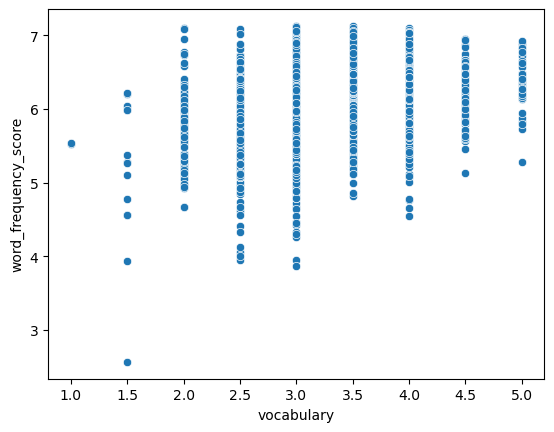

In [23]:
sns.scatterplot(data= dataset, x ='vocabulary', y='word_frequency_score')

<AxesSubplot:xlabel='vocabulary', ylabel='avg_word_length'>

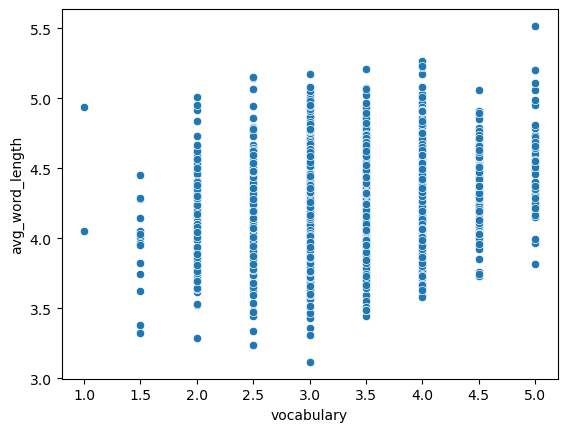

In [24]:
sns.scatterplot(data= dataset, x ='vocabulary', y='avg_word_length')

<AxesSubplot:xlabel='vocabulary', ylabel='avg_unique_words_per_total_words'>

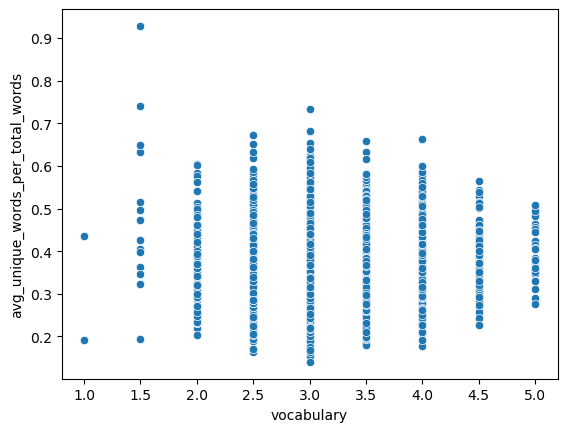

In [25]:
sns.scatterplot(data= dataset, x ='vocabulary', y='avg_unique_words_per_total_words')